In [8]:
%load_ext autoreload
%autoreload 2   

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[autoreload of data_analysis failed: Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\extensions\autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\extensions\autoreload.py", line 394, in superreload
    module = reload(module)
  File "C:\ProgramData\Anaconda3\lib\imp.py", line 314, in reload
    return importlib.reload(module)
  File "C:\ProgramData\Anaconda3\lib\importlib\__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 604, in _exec
  File "<frozen importlib._bootstrap_external>", line 783, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "d:\OneDrive - Olin College of Engineering\Learning\Classes\SoftDes\elections-benfords-law\data_analysis.py", line

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import data_analysis as helper

In [10]:
us_data = helper.csv_to_dataframe('data/2020-elections-data.csv')
leading_digits_us = helper.find_all_leading_digits(us_data['votes'], 1)
russia_data = helper.csv_to_dataframe('data/2018-Russia-election-data.csv')
leading_digits_russia = helper.find_all_leading_digits(russia_data['votes'], 1)

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64')


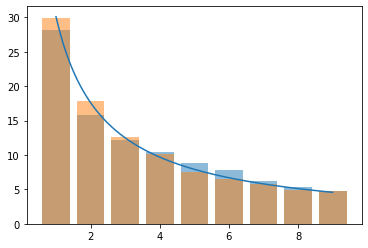

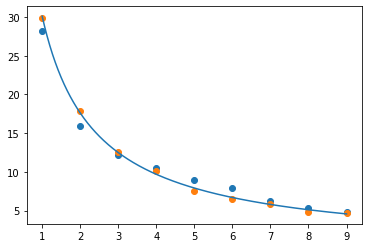

In [11]:
us_percentages = helper.data_to_percentage(leading_digits_us)
russia_percentages = helper.data_to_percentage(leading_digits_russia)
print(us_percentages.index)

theoretical_x_values = np.linspace(1, 9, 1000)
theoretical_y_values = np.log10(1 + 1 / theoretical_x_values) * 100

plt.bar(russia_percentages.index, russia_percentages, alpha=0.5)
plt.bar(us_percentages.index, us_percentages, alpha=0.5)

plt.plot(theoretical_x_values, theoretical_y_values)

plt.figure()

plt.scatter(russia_percentages.index, russia_percentages)
plt.scatter(us_percentages.index, us_percentages)

plt.plot(theoretical_x_values, theoretical_y_values)


In [12]:
print(helper.per_unique_data_point_votes(us_data, 0))

AttributeError: module 'data_analysis' has no attribute 'per_unique_data_point_votes'

In [74]:
print(helper.per_unique_data_point_votes(us_data, 3))

          AL      AK       AZ      AR        CA        CO        CT        DE  \
0    19838.0  3511.0  23293.0  4304.0  617659.0  134202.0  297505.0   44552.0   
1     7503.0  3477.0  11442.0  1818.0  136309.0   95657.0  169039.0   41009.0   
2      350.0   216.0    437.0    46.0    6295.0    3731.0    4593.0    1044.0   
3       79.0    50.0  35557.0    23.0    4664.0     744.0    1681.0     420.0   
4    83544.0    46.0  23732.0    22.0    3889.0     729.0  283368.0  195034.0   
..       ...     ...      ...     ...       ...       ...       ...       ...   
933      NaN     NaN      NaN     NaN       NaN       NaN       NaN       NaN   
934      NaN     NaN      NaN     NaN       NaN       NaN       NaN       NaN   
935      NaN     NaN      NaN     NaN       NaN       NaN       NaN       NaN   
936      NaN     NaN      NaN     NaN       NaN       NaN       NaN       NaN   
937      NaN     NaN      NaN     NaN       NaN       NaN       NaN       NaN   

          FL      GA  ...  

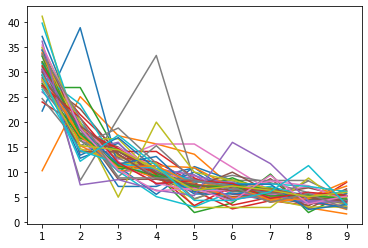

In [21]:
us_states_data = helper.get_votes_per_parameter(us_data, 3)
#us_states_leadings_digits = helper.find_all_leading_digits(us_states_data,1,)
#states_percentages = [helper.data_to_percentage(us_states_leadings_digits, state_names)]
# fig,axis = plt.subplots(nrows = 1, ncols = 1)
for state in us_states_data.columns: 
    state_leading_digits = helper.find_all_leading_digits(us_states_data[state],1)
    state_percentages = helper.data_to_percentage(state_leading_digits)
    plt.plot(state_percentages.index, state_percentages)